In [232]:
import pandas as pd 
import numpy as np 

In [233]:
df=pd.read_csv("Social_Network_Ads.csv")

In [234]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [235]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [236]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [237]:
sex = pd.get_dummies(df['Gender'])

df = pd.concat([df, sex], axis=1)
df = df.drop(['Gender'], axis=1)

In [238]:
df

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
...,...,...,...,...,...,...
395,15691863,46,41000,1,True,False
396,15706071,51,23000,1,False,True
397,15654296,50,20000,1,True,False
398,15755018,36,33000,0,False,True


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [240]:
x = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [241]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

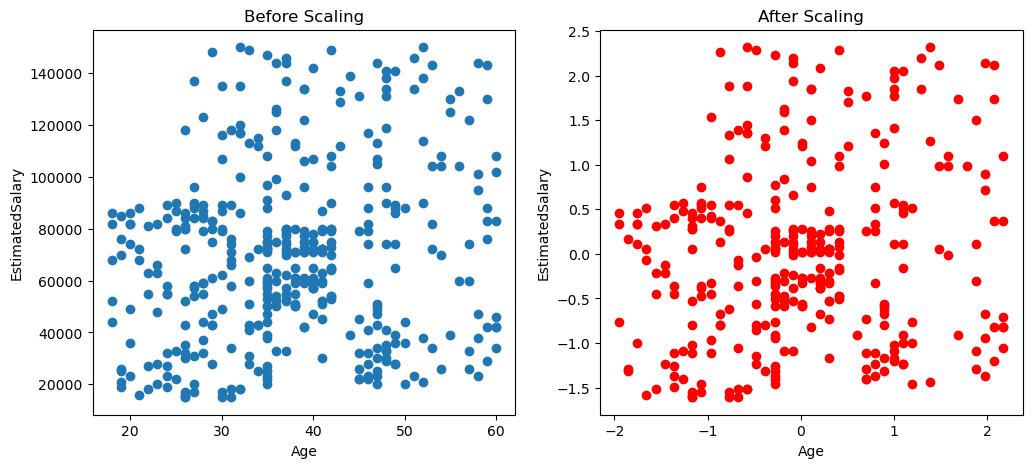

In [242]:
x_unscaled = df[['Age', 'EstimatedSalary']].values  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_unscaled[:, 0], x_unscaled[:, 1])
ax1.set_title("Before Scaling")
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')

ax2.scatter(x_train[:, 0], x_train[:, 1], color='red')
ax2.set_title("After Scaling")
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')

plt.show()

In [243]:
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [244]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [245]:
y_pred = knn_classifier.predict(x_test)

In [246]:
#accuracy
print(accuracy_score(y_test, y_pred))


0.9375


In [247]:
accuracy_values = []

for n_neighbors in range(1, 10):  
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)  

    print(f"n_neighbors = {n_neighbors}")
    print("Accuracy:", accuracy)
    print("=" * 30)

n_neighbors = 1
Accuracy: 0.825
n_neighbors = 2
Accuracy: 0.8625
n_neighbors = 3
Accuracy: 0.9125
n_neighbors = 4
Accuracy: 0.925
n_neighbors = 5
Accuracy: 0.9125
n_neighbors = 6
Accuracy: 0.9
n_neighbors = 7
Accuracy: 0.9375
n_neighbors = 8
Accuracy: 0.925
n_neighbors = 9
Accuracy: 0.9375


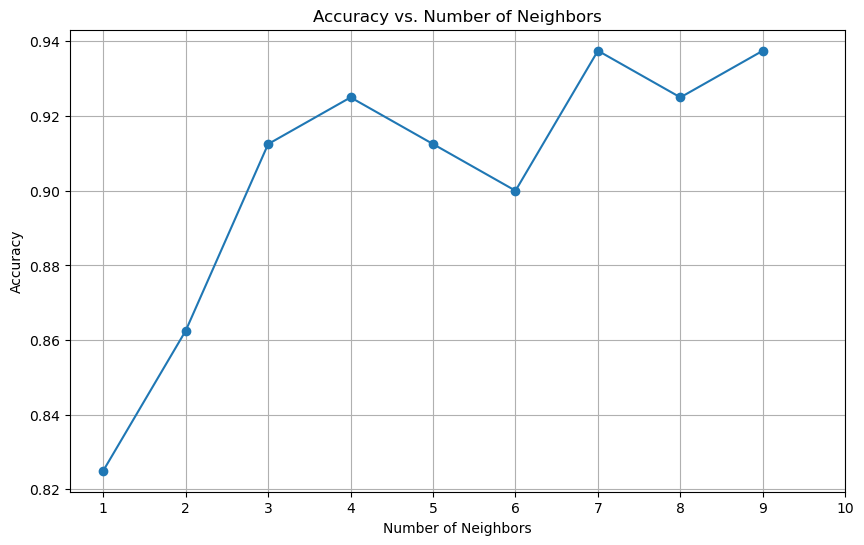

In [248]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

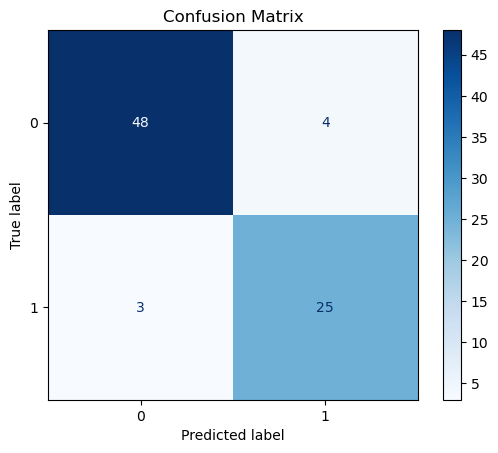

In [249]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()